In [1]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr

In [2]:
BTC = pdr.get_data_yahoo('BTC-USD',
start="01/01/2017", interval="d")

In [3]:
BTC

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-01,1003.080017,958.698975,963.658020,998.325012,1.477750e+08,998.325012
2017-01-02,1031.390015,996.702026,998.617004,1021.750000,2.221850e+08,1021.750000
2017-01-03,1044.079956,1021.599976,1021.599976,1043.839966,1.851680e+08,1043.839966
2017-01-04,1159.420044,1044.400024,1044.400024,1154.729980,3.449460e+08,1154.729980
2017-01-05,1191.099976,910.416992,1156.729980,1013.380005,5.101990e+08,1013.380005
...,...,...,...,...,...,...
2022-08-10,24127.414062,22771.519531,23162.898438,23947.642578,3.283743e+10,23947.642578
2022-08-11,24822.628906,23900.996094,23948.345703,23957.529297,3.712704e+10,23957.529297
2022-08-12,24412.566406,23657.265625,23957.203125,24402.818359,2.726580e+10,24402.818359


In [4]:
BTC.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-08-10,24127.414062,22771.519531,23162.898438,23947.642578,3.283743e+10,23947.642578
2022-08-11,24822.628906,23900.996094,23948.345703,23957.529297,3.712704e+10,23957.529297
2022-08-12,24412.566406,23657.265625,23957.203125,24402.818359,2.726580e+10,24402.818359
2022-08-13,24860.050781,24346.115234,24402.187500,24424.068359,2.298735e+10,24424.068359
2022-08-15,24393.080078,24230.625000,24296.685547,24381.177734,2.317034e+10,24381.177734


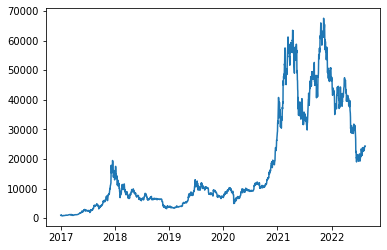

In [5]:
import matplotlib
from matplotlib.pyplot import*
plot(BTC["Close"])
show()

In [6]:
BTC.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2052 entries, 2017-01-01 to 2022-08-15
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       2052 non-null   float64
 1   Low        2052 non-null   float64
 2   Open       2052 non-null   float64
 3   Close      2052 non-null   float64
 4   Volume     2052 non-null   float64
 5   Adj Close  2052 non-null   float64
dtypes: float64(6)
memory usage: 112.2 KB


In [7]:
BTC["R"] = (BTC["Close"] / BTC["Close"].shift(1)) - 1
print(BTC["R"])

Date
2017-01-01         NaN
2017-01-02    0.023464
2017-01-03    0.021620
2017-01-04    0.106233
2017-01-05   -0.122410
                ...   
2022-08-10    0.033816
2022-08-11    0.000413
2022-08-12    0.018587
2022-08-13    0.000871
2022-08-15   -0.001756
Name: R, Length: 2052, dtype: float64


In [8]:
BTC["r"] = np.log(BTC['Adj Close']) - np.log(BTC['Adj Close'].shift(1))
BTCR = BTC[['R','r']].copy()

In [25]:
BTC= BTC.dropna()

In [10]:
sumret = BTC["R"].describe()
sumret

count    2051.000000
mean        0.002421
std         0.041340
min        -0.371695
25%        -0.015867
50%         0.002216
75%         0.020905
max         0.252472
Name: R, dtype: float64

In [11]:
BTC[BTC["R"]<-0.15]

,High,Low,Open,Close,Volume,Adj Close,R,r
Date,,,,,,,,
2017-09-14,3920.600098,3153.860107,3875.370117,3154.949951,2.716310e+09,3154.949951,-0.187411,-0.207530
2018-01-16,13843.099609,10194.900391,13836.099609,11490.500000,1.885380e+10,11490.500000,-0.168548,-0.184582
2018-02-05,8364.839844,6756.680176,8270.540039,6955.270020,9.285290e+09,6955.270020,-0.159688,-0.173982
2020-03-12,7929.116211,4860.354004,7913.616211,4970.788086,5.398036e+10,4970.788086,-0.371695,-0.464730
2022-06-13,26795.589844,22141.257812,26737.578125,22487.388672,6.820456e+10,22487.388672,-0.159747,-0.174053


In [12]:
BTC[BTC["R"]>0.15].sort_values(by=['R'], ascending=False)

,High,Low,Open,Close,Volume,Adj Close,R,r
Date,,,,,,,,
2017-12-07,17899.699219,14057.299805,14266.099609,17899.699219,1.795070e+10,17899.699219,0.252472,0.225119
2017-07-20,2900.699951,2269.889893,2269.889893,2817.600098,2.249260e+09,2817.600098,0.239361,0.214596
2017-12-06,14369.099609,11923.400391,11923.400391,14291.500000,1.265630e+10,14291.500000,0.199283,0.181724
2021-02-08,46203.929688,38076.324219,38886.828125,46196.464844,1.014672e+11,46196.464844,0.187465,0.171821
2020-03-19,6329.735840,5236.968750,5245.416504,6191.192871,5.100073e+10,6191.192871,0.181878,0.167104
2019-04-02,4905.954590,4155.316895,4156.919434,4879.877930,2.131505e+10,4879.877930,0.173560,0.160042
2019-10-25,8691.540039,7479.984375,7490.703125,8660.700195,2.870507e+10,8660.700195,0.155763,0.144761
2017-07-17,2230.489990,1932.619995,1932.619995,2228.409912,1.201760e+09,2228.409912,0.154724,0.143862
2017-09-15,3733.449951,2946.620117,3166.300049,3637.520020,4.148070e+09,3637.520020,0.152956,0.142330


In [13]:
print("The daily average return of Bitcoin is ", BTC["r"].mean())
print("The daily variance of Bitcoin is ", BTC["r"].var())
print("The daily standard deviation (volatility) of Bitcoin return is ", BTC["r"].std())
print("The daily median return of Bitcoin is ",BTC["r"].median())

The daily average return of Bitcoin is  0.0015580145404379693
The daily variance of Bitcoin is  0.0017348514363876686
The daily standard deviation (volatility) of Bitcoin return is  0.04165154782703361
The daily median return of Bitcoin is  0.0022137248439948465


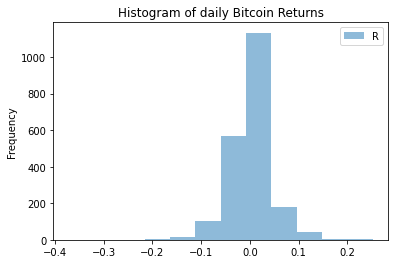

In [26]:
R_bitcoin = pd.DataFrame(BTC[["R"]])
hist=R_bitcoin.plot.hist(bins=12,alpha=0.5,title="Histogram of daily Bitcoin Returns")

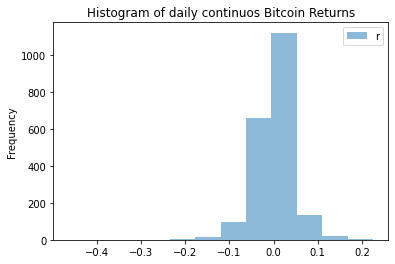

In [27]:
r_bitcoin = pd.DataFrame(BTC[["r"]])
hist=r_bitcoin.plot.hist(bins=12,alpha=0.5,title="Histogram of daily continuos Bitcoin Returns")
# Se puede ver que la gráfica tiene la mayor cantidad de returns en la mitad derecha. La mayor parte de los datos están entre -0.1 y 0.1 habiendo muy pocos valores fuera de este rango, valores fuera de [-0.3, 0.3] son inexistentes. No parece haber mucha diferencia entre r y R.

In [19]:
from matplotlib import pyplot

In [23]:
ccret = BTC["r"].to_numpy()

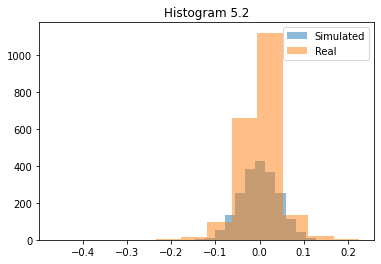

In [24]:
x = np.random.normal(loc=BTC["r"].mean(), scale=BTC["r"].std(), size=BTC["r"].count())
y = ccret
bins = 12

pyplot.hist(x, bins, alpha=0.5, label="Simulated")
pyplot.hist(y, bins, alpha=0.5, label="Real")
pyplot.legend(loc="upper right")
pyplot.title(label="Histogram 5.2")
pyplot.show()

#